### Implementation of PCA and KPCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import MiniBatchSparsePCA
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
%matplotlib inline

In [ ]:
import gdown
import pandas as pd



In [ ]:
url = 'https://drive.google.com/uc?id=1TPRvPMFgMxt_rsaExZeH5k9wZUuz0rXo'
output = 'GSE85241_cellsystems_dataset_4donors.csv'
gdown.download(url, output, quiet=False)

data = pd.read_csv(output, sep='\t', index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1TPRvPMFgMxt_rsaExZeH5k9wZUuz0rXo
To: /content/GSE85241_cellsystems_dataset_4donors.csv
100%|██████████| 299M/299M [00:03<00:00, 82.1MB/s]


### PCA

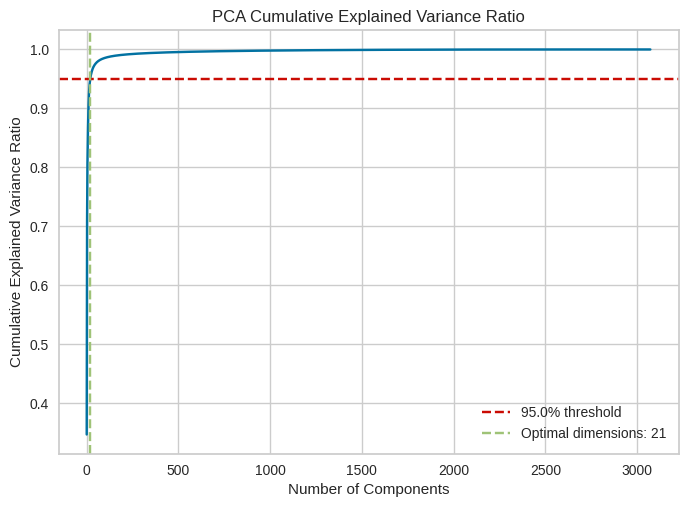

Optimal number of dimensions: 21


In [ ]:
pca_full = PCA()
pca_full.fit(data.T)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

threshold = 0.95

# finding optiminal components that meets the threshold

optimal_dimensions = np.where(cumulative_explained_variance >= threshold)[0][0] + 1

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.axhline(y=threshold, color='r', linestyle='--', label=f"{threshold * 100}% threshold")
plt.axvline(x=optimal_dimensions, color='g', linestyle='--', label=f"Optimal dimensions: {optimal_dimensions}")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Cumulative Explained Variance Ratio')
plt.legend()
plt.show()

print(f"Optimal number of dimensions: {optimal_dimensions}")

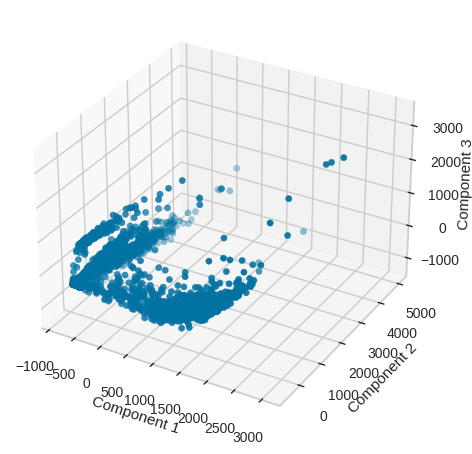

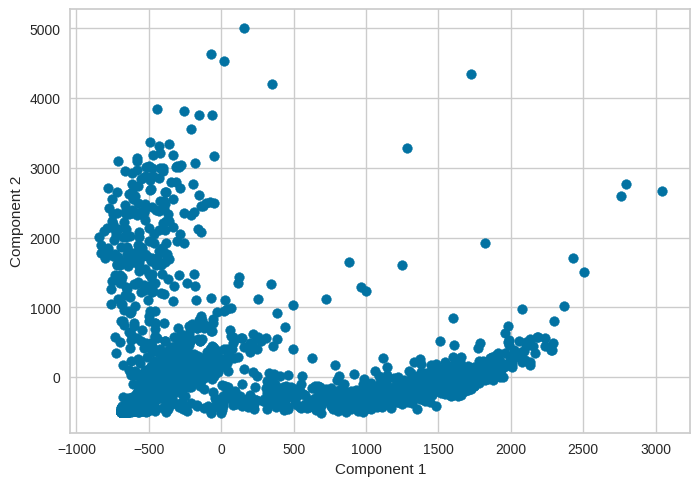

In [ ]:
pca = PCA(n_components=optimal_dimensions)
pca_result = pca.fit_transform(data.T)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Num Clusters = 2
Silhouette Score = 0.4281
----------------------------
Num Clusters = 3
Silhouette Score = 0.4872
----------------------------
Num Clusters = 4
Silhouette Score = 0.4964
----------------------------
Num Clusters = 5
Silhouette Score = 0.4223
----------------------------
Num Clusters = 6
Silhouette Score = 0.3895
----------------------------
Num Clusters = 7
Silhouette Score = 0.3908
----------------------------


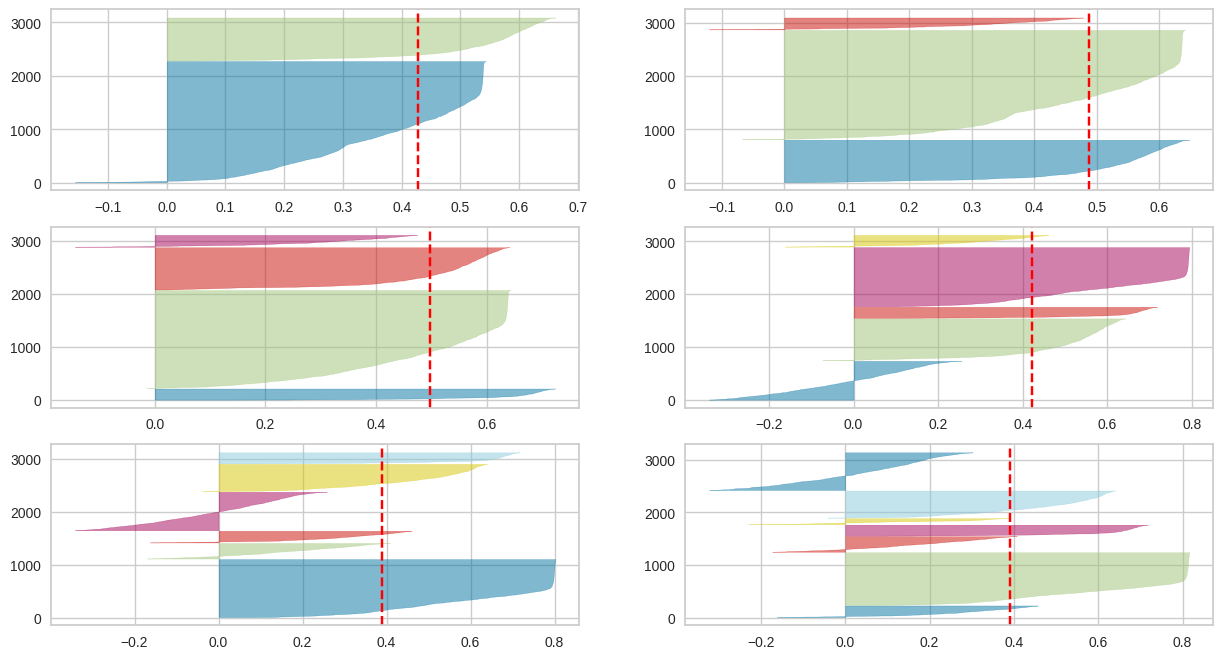

In [ ]:
# Apply KMeans clustering and display the silhouette score for each number of clusters
fig, ax = plt.subplots(3, 2, figsize=(15, 8))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=100,
                random_state=42)

    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_result)

    print(f"Num Clusters = {i}")
    print(f"Silhouette Score = {visualizer.silhouette_score_:0.4f}")
    print("----------------------------")

In [ ]:
# Calculate the average silhouette score
kmeans = KMeans(n_clusters=4, random_state=0).fit(pca_result)
silhouetteAvg = silhouette_score(pca_result, kmeans.labels_)
print('\n\nSilhouette Score Average =', silhouetteAvg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




Silhouette Score Average = 0.4963913357527921


<ipython-input-13-ecc2ae5d7ac8>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


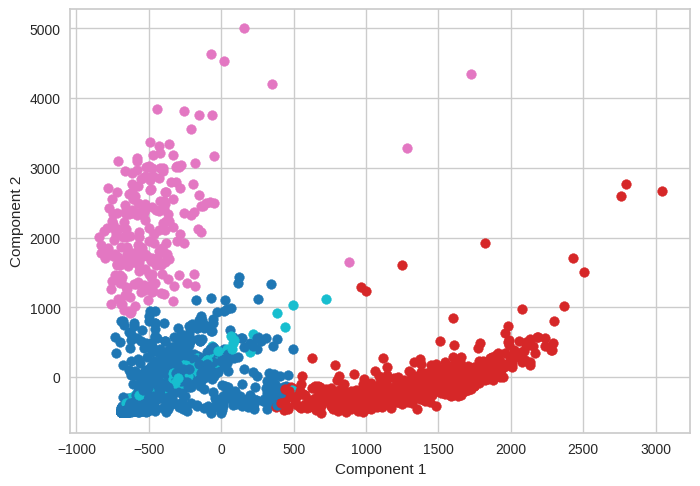

In [ ]:
# Create a scatter plot using the PCA transformed data and assign colors to the points based on the cluster labels assigned by the K-Means clustering algorithm.
n_clusters = 4
colors = plt.cm.get_cmap('tab10', n_clusters)

fig, ax = plt.subplots()
for i in range(len(kmeans.labels_)):
    ax.scatter(pca_result[i, 0],
               pca_result[i, 1],
               color=colors(kmeans.labels_[i]))

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

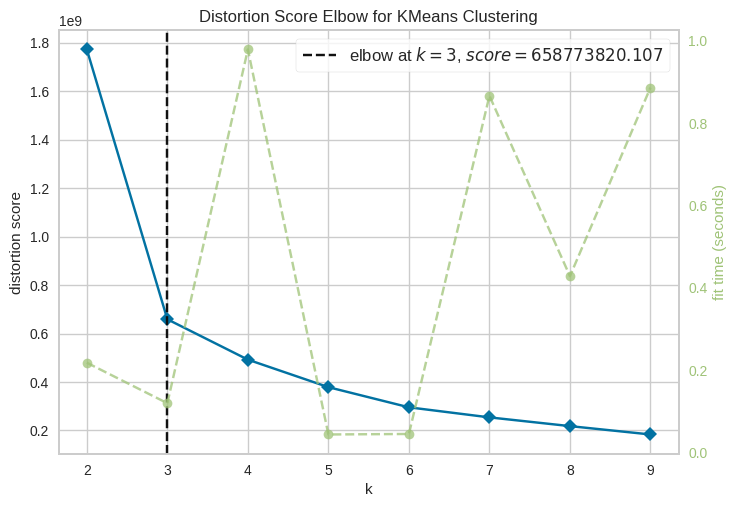

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Perform the K-Means clustering algorithm and use the elbow method to determine the optimal number of clusters for the PCA transformed data.
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2, 10))

visualizer.fit(pca_result)
visualizer.show()

### K-PCA

Gamma = 0.0010
-----------------------------


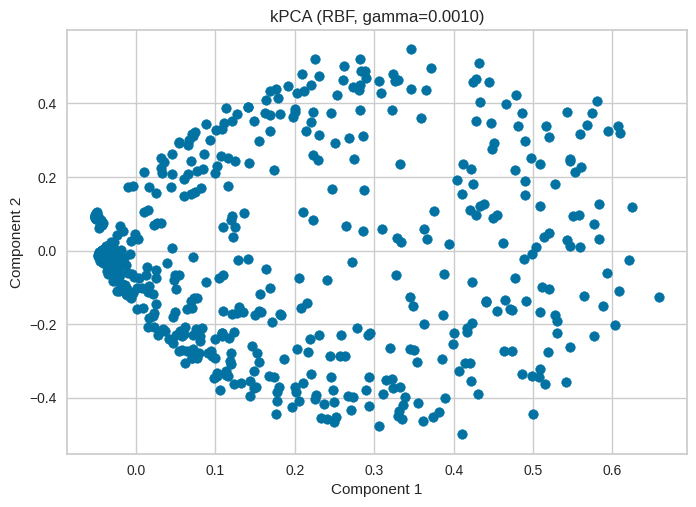

Num Clusters = 2
Silhouette Score = 0.7923
----------------------------
Num Clusters = 3
Silhouette Score = 0.8068
----------------------------
Num Clusters = 4
Silhouette Score = 0.8170
----------------------------
Num Clusters = 5
Silhouette Score = 0.8297
----------------------------
Num Clusters = 6
Silhouette Score = 0.8352
----------------------------
Num Clusters = 7
Silhouette Score = 0.8346
----------------------------


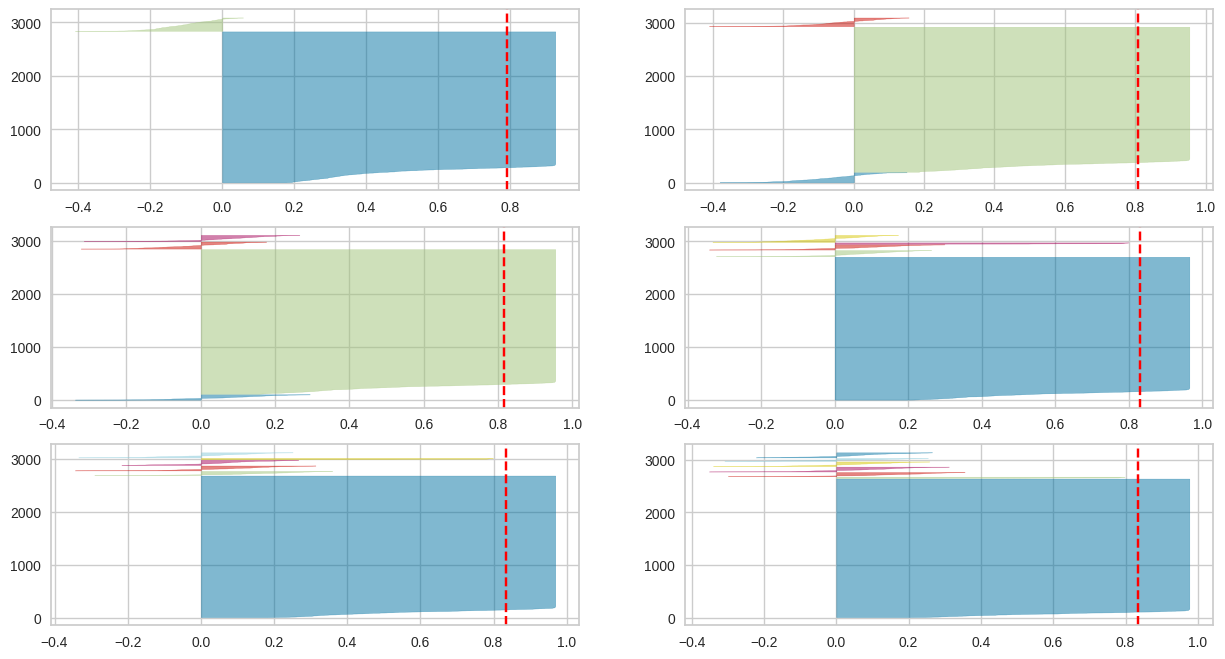

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

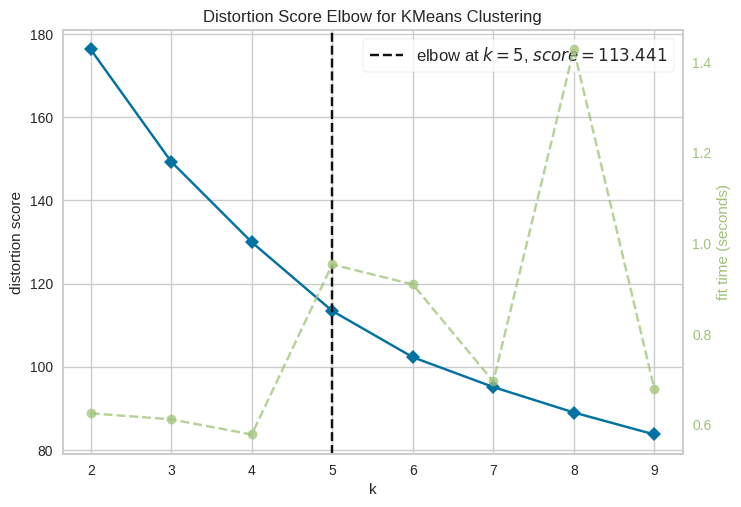

Gamma = 0.0100
-----------------------------


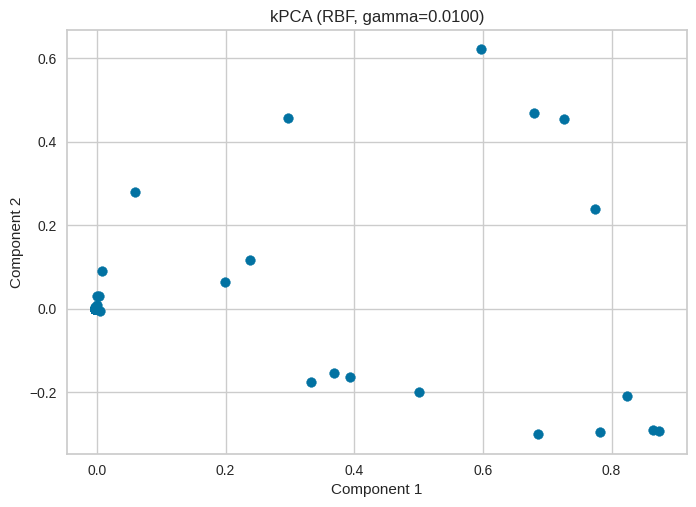

Num Clusters = 2
Silhouette Score = 0.9574
----------------------------
Num Clusters = 3
Silhouette Score = 0.9483
----------------------------
Num Clusters = 4
Silhouette Score = 0.9383
----------------------------
Num Clusters = 5
Silhouette Score = 0.9164
----------------------------
Num Clusters = 6
Silhouette Score = 0.9469
----------------------------
Num Clusters = 7
Silhouette Score = 0.9410
----------------------------


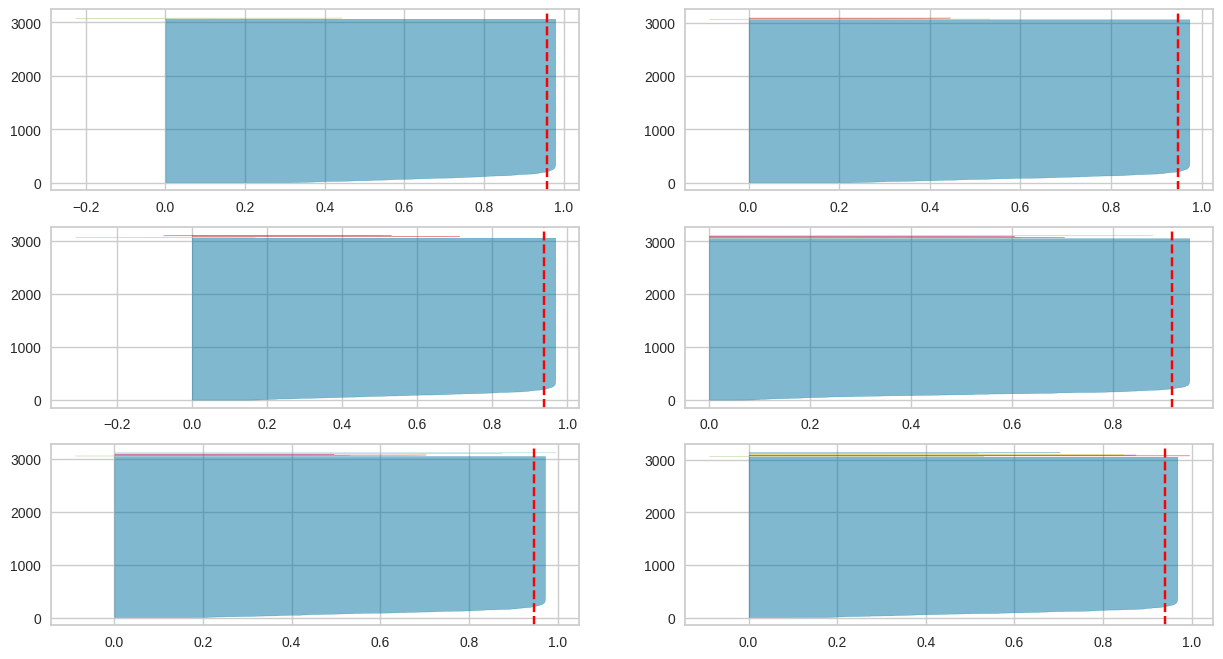

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

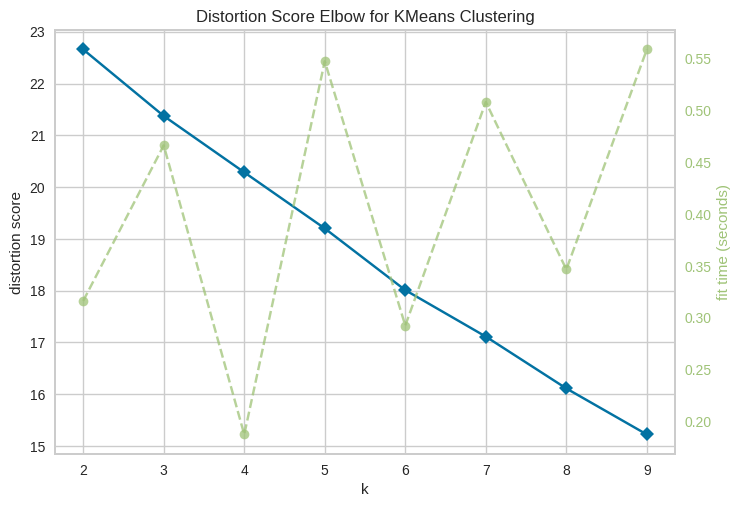

Gamma = 0.1000
-----------------------------
kPCA transformation failed for gamma = 0.1000
Error message: zero-size array to reduction operation maximum which has no identity
-----------------------------
Gamma = 1.0000
-----------------------------


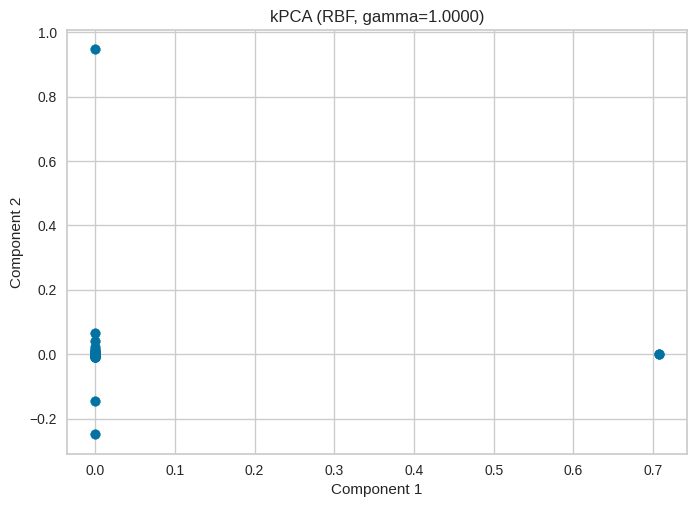

Num Clusters = 2
Silhouette Score = 0.9928
----------------------------
Num Clusters = 3
Silhouette Score = 0.9932
----------------------------
Num Clusters = 4
Silhouette Score = 0.9935
----------------------------
Num Clusters = 5
Silhouette Score = 0.9746
----------------------------
Num Clusters = 6
Silhouette Score = 0.9750
----------------------------
Num Clusters = 7
Silhouette Score = 0.6346
----------------------------


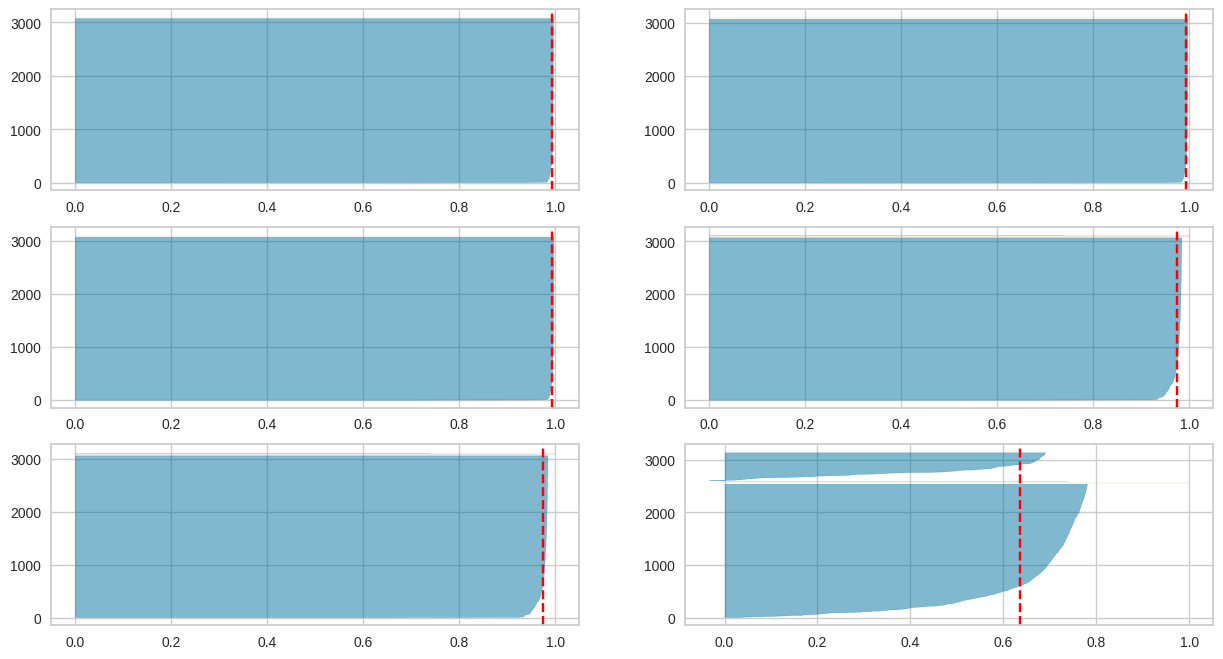

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

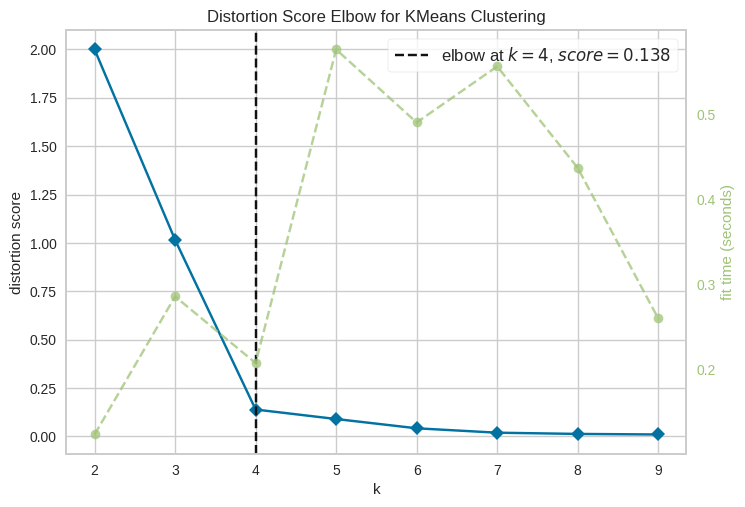

Gamma = 10.0000
-----------------------------


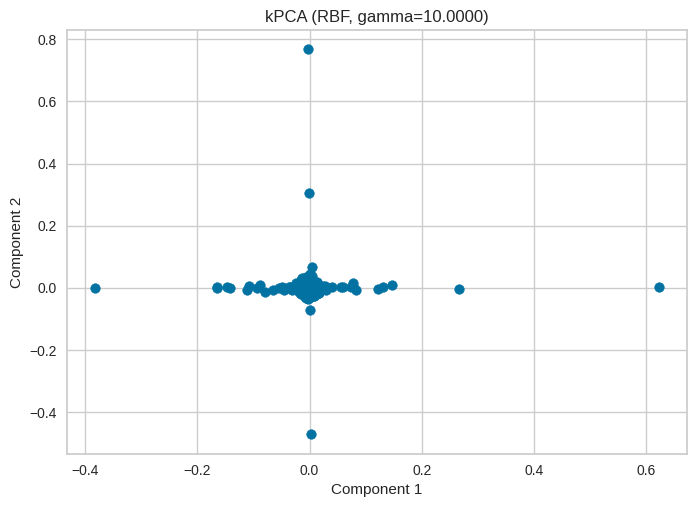

Num Clusters = 2
Silhouette Score = 0.9337
----------------------------
Num Clusters = 3
Silhouette Score = 0.9261
----------------------------
Num Clusters = 4
Silhouette Score = 0.9268
----------------------------
Num Clusters = 5
Silhouette Score = 0.9301
----------------------------
Num Clusters = 6
Silhouette Score = 0.9244
----------------------------
Num Clusters = 7
Silhouette Score = 0.9307
----------------------------


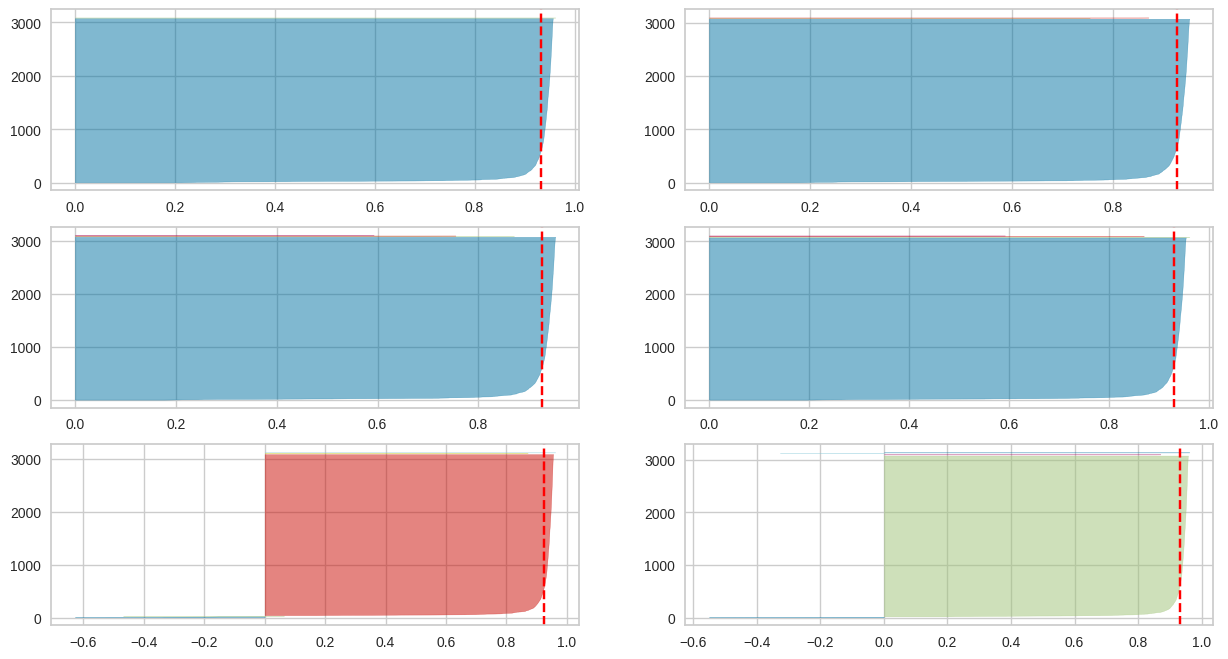

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

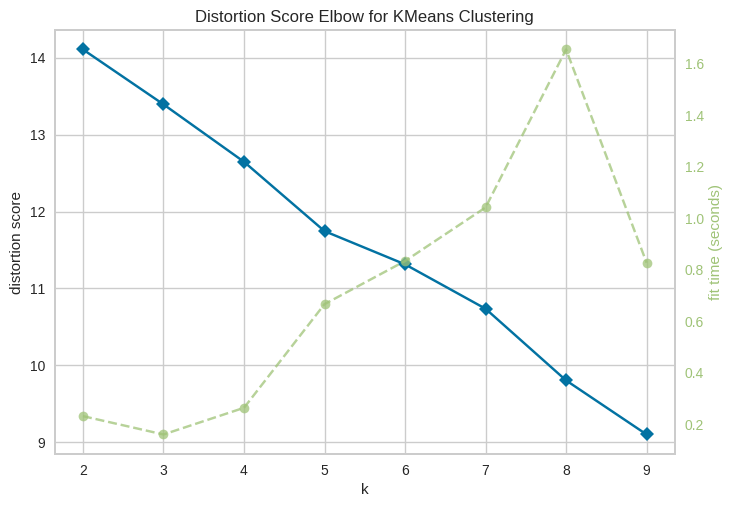

Gamma = 100.0000
-----------------------------


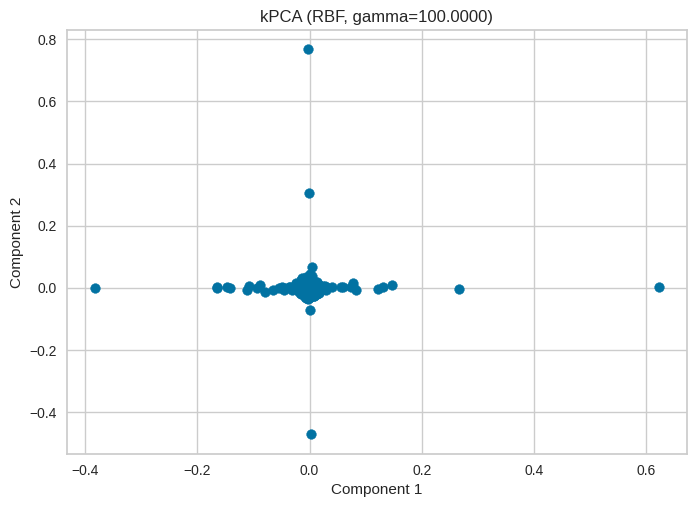

Num Clusters = 2
Silhouette Score = 0.9337
----------------------------
Num Clusters = 3
Silhouette Score = 0.9261
----------------------------
Num Clusters = 4
Silhouette Score = 0.9268
----------------------------
Num Clusters = 5
Silhouette Score = 0.9301
----------------------------
Num Clusters = 6
Silhouette Score = 0.9244
----------------------------
Num Clusters = 7
Silhouette Score = 0.9307
----------------------------


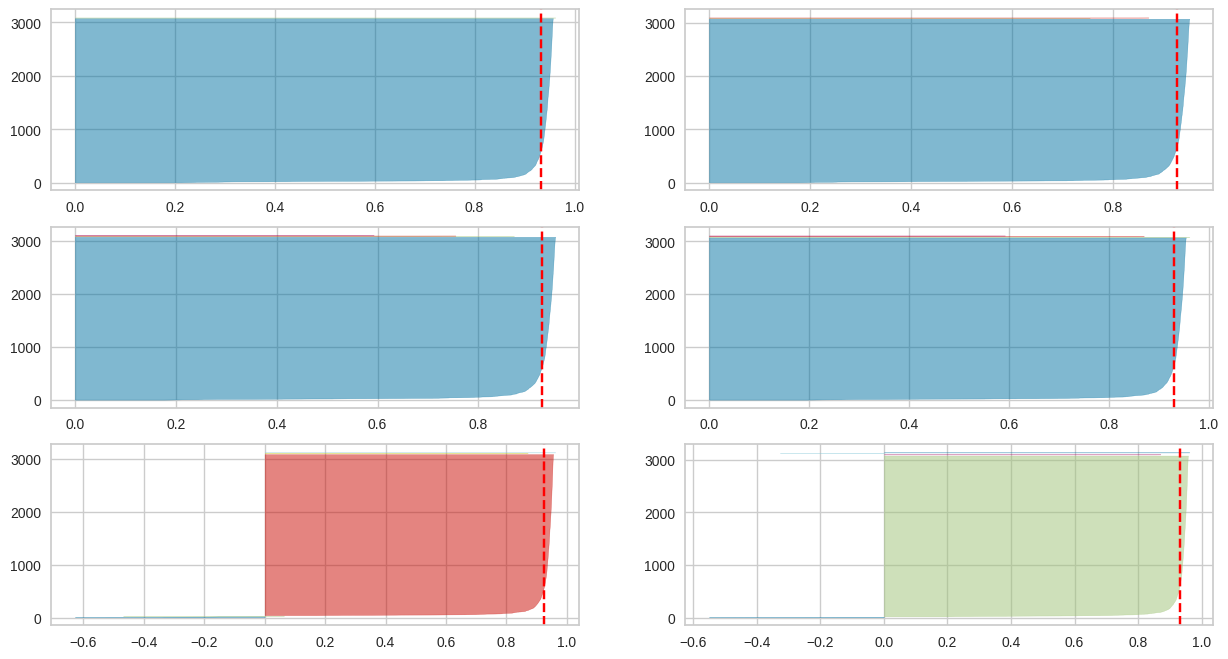

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

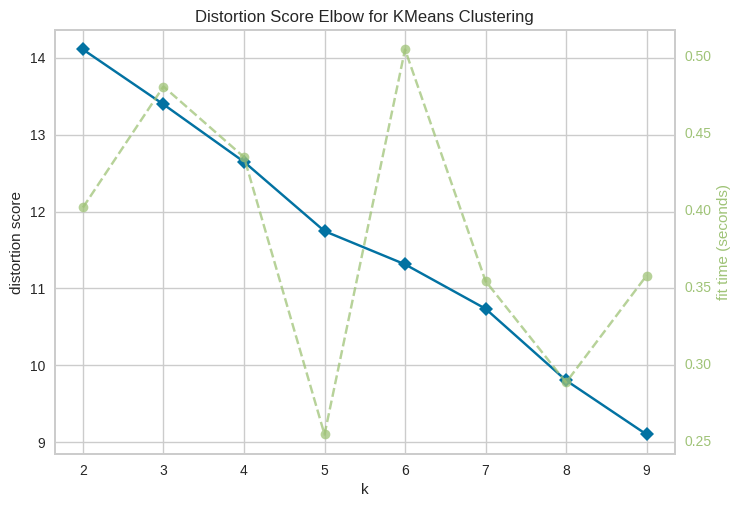

Gamma = 1000.0000
-----------------------------


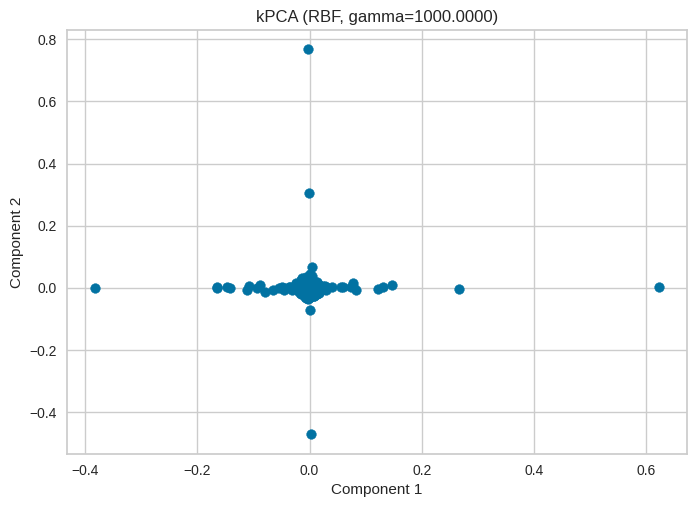

Num Clusters = 2
Silhouette Score = 0.9337
----------------------------
Num Clusters = 3
Silhouette Score = 0.9261
----------------------------
Num Clusters = 4
Silhouette Score = 0.9268
----------------------------
Num Clusters = 5
Silhouette Score = 0.9301
----------------------------
Num Clusters = 6
Silhouette Score = 0.9244
----------------------------
Num Clusters = 7
Silhouette Score = 0.9307
----------------------------


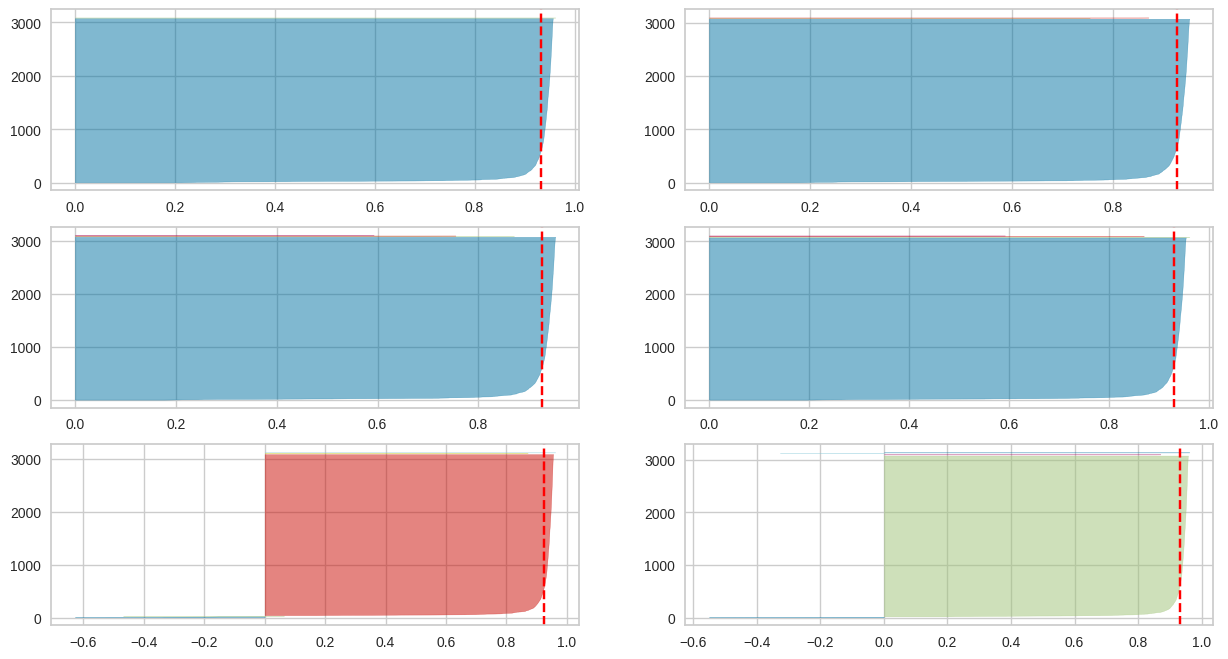

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

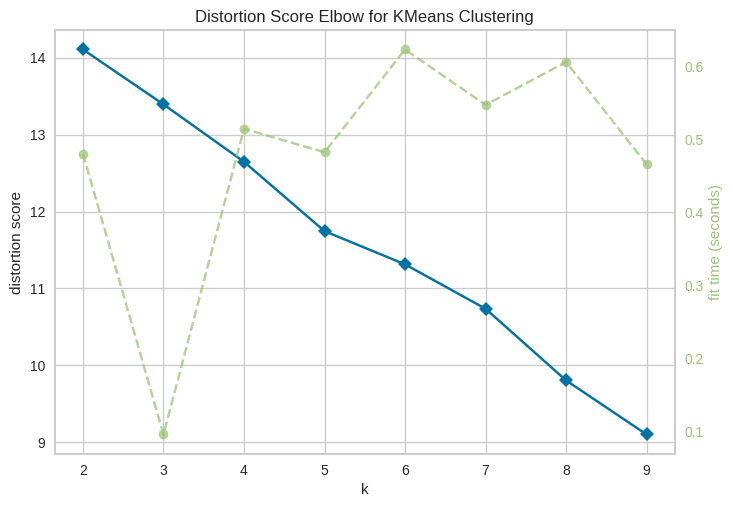

In [ ]:
gamma_values = np.logspace(-3, 3, 7)


# included gamma value to handle cases where kPCA transformation fails for a specific gamma value.

for gamma in gamma_values:
    try:
        print(f"Gamma = {gamma:.4f}")
        print("-----------------------------")

        kpca = KernelPCA(n_components=21, kernel='rbf', gamma=gamma)
        kpca_result = kpca.fit_transform(data.T)


        # Plot kPCA result
        plt.scatter(kpca_result[:, 0], kpca_result[:, 1])
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.title(f"kPCA (RBF, gamma={gamma:.4f})")
        plt.show()

        # Apply KMeans clustering and display the silhouette score for each number of clusters
        fig, ax = plt.subplots(3, 2, figsize=(15, 8))
        for i in [2, 3, 4, 5, 6, 7]:
            km = KMeans(n_clusters=i,
                        init='k-means++',
                        n_init=10,
                        max_iter=100,
                        random_state=42)

            q, mod = divmod(i, 2)

            visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
            visualizer.fit(kpca_result)

            print(f"Num Clusters = {i}")
            print(f"Silhouette Score = {visualizer.silhouette_score_:0.4f}")
            print("----------------------------")

        plt.show()

        # Perform the K-Means clustering algorithm and use the elbow method to determine the optimal number of clusters for the kPCA transformed data.
        km = KMeans(random_state=42)
        visualizer = KElbowVisualizer(km, k=(2, 10))

        visualizer.fit(kpca_result)
        visualizer.show()

    except ValueError as e:
        print(f"kPCA transformation failed for gamma = {gamma:.4f}")
        print(f"Error message: {str(e)}")
        print("-----------------------------")